In [23]:
# 1	Load csv file in notebook using python code 
import pandas as pd
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [24]:
# 2	Explore Data using python code (2)
# •	Total records, Null count
print("Print total no of records: ",len(df))
# null count
print("NULL COUNTS:\n",df.isnull().sum(axis = 0))

Print total no of records:  5110
NULL COUNTS:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [25]:
# •	Mean, median, std-dev for each numerical column
print("MEAN: \n",df.mean(numeric_only=True))
print("MEDIAN: \n",df.median(numeric_only=True))
print("MODE: \n",df.mode(numeric_only=True))

MEAN: 
 id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64
MEDIAN: 
 id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                     28.100
stroke                   0.000
dtype: float64
MODE: 
          id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0        67  78.0           0.0            0.0              93.88  28.7   
1        77   NaN           NaN            NaN                NaN   NaN   
2        84   NaN           NaN            NaN                NaN   NaN   
3        91   NaN           NaN            NaN                NaN   NaN   
4        99   NaN           NaN            NaN                NaN   NaN   
...     ...   ...           ...        

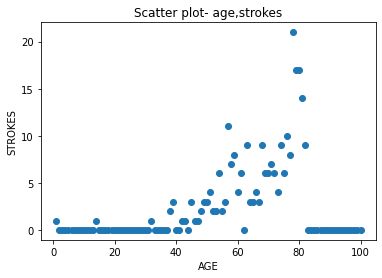

In [26]:
import matplotlib.pyplot as plt
l=list(df["stroke"])
ll=[x for x in df["stroke"] if x==1]
ageStroke={}
cnt=1
for i in range(1,101):
    ageStroke[cnt]=0
    cnt+=1

for i,rows in df.iterrows():
    if rows["stroke"]:
        ageStroke[int(rows["age"])] =ageStroke[int(rows["age"])] +1
        

age = list(ageStroke.keys())
strokes = list(ageStroke.values())
plt.scatter(age,strokes)
plt.title("Scatter plot- age,strokes") #title
plt.xlabel("AGE") #x label
plt.ylabel("STROKES") #y label
plt.show()

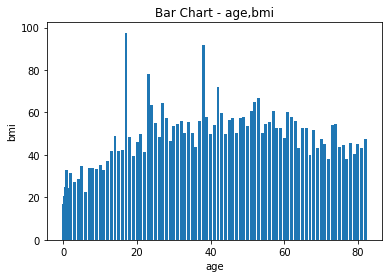

In [27]:

# 1	Plot charts and explain them in words(min 2 charts) (3)

# Bar chart with day against tip
plt.bar(df['age'], df['bmi'])
plt.title("Bar Chart - age,bmi")
plt.xlabel('age')
plt.ylabel('bmi')
plt.show()


In [28]:
# 2	Check if “BMI” column has null values? what is the percentage of null values ? use data engineering method to fill the null values. 
print("Total null in bmi: ",df['bmi'].isnull().sum())
print("Percentage of null in bmi: ",df['bmi'].isnull().sum() * 100 / len(df["bmi"]))
df['bmi'] = df['bmi'].fillna(df["bmi"].mode())

Total null in bmi:  201
Percentage of null in bmi:  3.9334637964774952


In [29]:
df['bmi'] = df['bmi'].fillna(df["bmi"].median())

In [30]:
print("Total null in bmi: ",df['bmi'].isnull().sum())

Total null in bmi:  0


In [31]:
# 3	Remove outliers from any two numerical columns using any appropriate ML technique(3)
# Creating new col z-score for bmi
df['z_score_bmi'] = (df['bmi'] - df['bmi'].mean()) / df['bmi'].std()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,z_score_bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.004988
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,-0.098971
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0.472490
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0.719257
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,-0.631469


In [32]:
# finding outliers
df[(df['z_score_bmi'] < -3) | (df['z_score_bmi'] > 3)].head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,z_score_bmi
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1,3.602538
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0,3.342783
270,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,4.161011
333,1703,Female,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0,3.355771
358,66333,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0,4.667533


In [33]:
print("OLD COUNT (with outliers): ",df["bmi"].count())
# REMOVING OUTLIERS
df = df[(df['z_score_bmi'] < 3) & (df['z_score_bmi'] > -3)]
print("NEW COUNT (without outliers): ",df["bmi"].count())

OLD COUNT (with outliers):  5110
NEW COUNT (without outliers):  5051


In [34]:
# 4	Perform Scaling on all numerical columns(3)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Scaling the Price column of the created dataFrame and storing
# the result in ScaledPrice Column
df[["scaled_age", "hypertension","scaled_heart_disease","scaled_avg_glucose_level","scaled_bmi","scaled_stroke"]] = scaler.fit_transform(df[["age", "hypertension","heart_disease","avg_glucose_level","bmi","stroke"]])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,z_score_bmi,scaled_age,scaled_heart_disease,scaled_avg_glucose_level,scaled_bmi,scaled_stroke
0,9046,Male,67.0,0.0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.004988,0.816895,1.0,0.801265,0.632212,1.0
1,51676,Female,61.0,0.0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,-0.098971,0.743652,0.0,0.679023,0.427885,1.0
2,31112,Male,80.0,0.0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0.472490,0.975586,1.0,0.234512,0.533654,1.0
3,60182,Female,49.0,0.0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0.719257,0.597168,0.0,0.536008,0.579327,1.0
4,1665,Female,79.0,1.0,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,-0.631469,0.963379,0.0,0.549349,0.329327,1.0


In [35]:
# 5	Perform Encoding on all categorical columns(3)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,z_score_bmi,scaled_age,scaled_heart_disease,scaled_avg_glucose_level,scaled_bmi,scaled_stroke
0,9046,1,67.0,0.0,1,1,2,1,228.69,36.6,1,1,1.004988,0.816895,1.0,0.801265,0.632212,1.0
1,51676,0,61.0,0.0,0,1,3,0,202.21,28.1,2,1,-0.098971,0.743652,0.0,0.679023,0.427885,1.0
2,31112,1,80.0,0.0,1,1,2,0,105.92,32.5,2,1,0.472490,0.975586,1.0,0.234512,0.533654,1.0
3,60182,0,49.0,0.0,0,1,2,1,171.23,34.4,3,1,0.719257,0.597168,0.0,0.536008,0.579327,1.0
4,1665,0,79.0,1.0,0,1,3,0,174.12,24.0,2,1,-0.631469,0.963379,0.0,0.549349,0.329327,1.0


In [36]:
# 6	Generate at least 2 new features using existing features of your choice(3).

# Adding feature for bmi details according to bmi
l=[]
for i,rows in df.iterrows():
    if rows["bmi"] <= 18.5:
        l.append("UNDERWEIGHT")     
    elif rows["bmi"] <= 24.9:  
        l.append("HEALTHY")  
    elif rows["bmi"] <= 29.9:  
        l.append("OVERWEIGHT")  
    else:  
        l.append("OBSESE")
df['feature_bmi_details'] = l
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,z_score_bmi,scaled_age,scaled_heart_disease,scaled_avg_glucose_level,scaled_bmi,scaled_stroke,feature_bmi_details
0,9046,1,67.0,0.0,1,1,2,1,228.69,36.6,1,1,1.004988,0.816895,1.0,0.801265,0.632212,1.0,OBSESE
1,51676,0,61.0,0.0,0,1,3,0,202.21,28.1,2,1,-0.098971,0.743652,0.0,0.679023,0.427885,1.0,OVERWEIGHT
2,31112,1,80.0,0.0,1,1,2,0,105.92,32.5,2,1,0.472490,0.975586,1.0,0.234512,0.533654,1.0,OBSESE
3,60182,0,49.0,0.0,0,1,2,1,171.23,34.4,3,1,0.719257,0.597168,0.0,0.536008,0.579327,1.0,OBSESE
4,1665,0,79.0,1.0,0,1,3,0,174.12,24.0,2,1,-0.631469,0.963379,0.0,0.549349,0.329327,1.0,HEALTHY
